In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from proj1_helpers import *
from implementations import *

In [2]:
#Data loading
labels, raw_data, indices = load_csv_data('train.csv', sub_sample=False)
labels_te, raw_data_te, indices_te = load_csv_data('test.csv', sub_sample=False)

#Data division according to jets
labels0, data0, labels1, data1, labels2, data2 = divide_data(labels, raw_data)
labels0_te, data0_te, labels1_te, data1_te, labels2_te, data2_te = divide_data(labels_te, raw_data_te)
print('Train:', '0 jet', data0.shape, ', 1 jet', data1.shape, ', 2 jet', data2.shape)
print('Test:', '0 jet', data0_te.shape, ', 1 jet', data1_te.shape, ', 2 jet', data2_te.shape)

#Remove features with variance 0
clean_data0, clean_data0_te = remove_novar_features(data0, data0_te)
clean_data1, clean_data1_te = remove_novar_features(data1, data1_te)
clean_data2, clean_data2_te = remove_novar_features(data2, data2_te)

#Data standardization
std_data0, mean0, std0 = standardize_train(clean_data0) 
std_data0_te = standardize_test(clean_data0_te, mean0, std0)

std_data1, mean1, std1 = standardize_train(clean_data1)
std_data1_te = standardize_test(clean_data1_te, mean1, std1)

std_data2, mean2, std2 = standardize_train(clean_data2)
std_data2_te = standardize_test(clean_data2_te, mean2, std2)

#Column 0 estimation
estimated_data0, weights_train0 = column_estimation_train(std_data0)
estimated_data0_te = column_estimation_test(std_data0_te, weights_train0)

estimated_data1, weights_train1 = column_estimation_train(std_data1)
estimated_data1_te = column_estimation_test(std_data1_te, weights_train1)

estimated_data2, weights_train2 = column_estimation_train(std_data2)
estimated_data2_te = column_estimation_test(std_data2_te, weights_train2)

Train: 0 jet (99913, 30) , 1 jet (77544, 30) , 2 jet (72543, 30)
Test: 0 jet (227458, 30) , 1 jet (175338, 30) , 2 jet (165442, 30)
Columns with variance = 0 : (array([ 4,  5,  6, 12, 22, 23, 24, 25, 26, 27, 28, 29]),)
New data shape : (99913, 18)
Columns with variance = 0 : (array([ 4,  5,  6, 12, 22, 26, 27, 28]),)
New data shape : (77544, 22)
Columns with variance = 0 : (array([], dtype=int64),)
New data shape : (72543, 30)
26123 NaN lines found
7562 NaN lines found
4429 NaN lines found


In [22]:
#### RIDGE REGRESSION ####

#Find best parameters
degrees = [9,10,11,12]
lambdas = np.logspace(-1, -10, 10)
k_fold = 10
seed = 23
best_degree0, best_lambda0, best_score0, scores0 = find_best_parameters(labels0, estimated_data0, k_fold, lambdas, degrees, seed)
print('jet0:', 'Best degree:', best_degree0, 'Best lambda:', best_lambda0, 'Best score:', best_score0)
best_degree1, best_lambda1, best_score1, scores1 = find_best_parameters(labels1, estimated_data1, k_fold, lambdas, degrees, seed)
print('jet1:', 'Best degree:', best_degree1, 'Best lambda:', best_lambda1, 'Best score:', best_score1)
best_degree2, best_lambda2, best_score2, scores2 = find_best_parameters(labels2, estimated_data2, k_fold, lambdas, degrees, seed)
print('jet2:', 'Best degree:', best_degree2, 'Best lambda:', best_lambda2, 'Best score:', best_score2)

jet1: Best degree: 11 Best lambda: 0.0001 Best score: 0.8010833118390508


0.8259535736609022


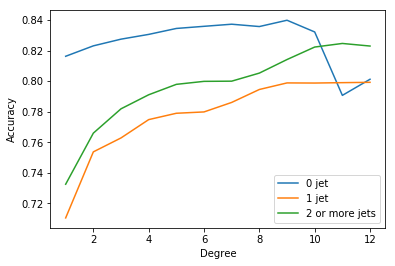

In [20]:
plt.plot(degrees, np.mean(scores0, axis = 1), label = '0 jet')
plt.plot(degrees, np.mean(scores1, axis = 1), label = '1 jet')
plt.plot(degrees, np.mean(scores2, axis = 1), label = '2 or more jets')
plt.ylabel('Accuracy')
plt.xlabel('Degree')
plt.legend()
plt.show
plt.savefig('plot.png')

In [ ]:
#Prediction making
y_pred0 = make_predictions(estimated_data0, labels0, estimated_data0_te, best_lambda0, best_degree0)
y_pred1 = make_predictions(estimated_data1, labels1, estimated_data1_te, best_lambda1, best_degree1)
y_pred2 = make_predictions(estimated_data2, labels2, estimated_data2_te, best_lambda2, best_degree0)

#Submission making
labels_te[np.where(raw_data_te[:,22] == 0)[0]] = y_pred0
labels_te[np.where(raw_data_te[:,22] == 1)[0]] = y_pred1
labels_te[np.where(raw_data_te[:,22] > 1)[0]] = y_pred2

create_csv_submission(indices_te, labels_te, 'test_jet.csv')

In [24]:
#### LOGISTIC REGRESSION ####

#Labels conversion to binary values
labels0[labels0 == -1] = 0
labels1[labels1 == -1] = 0
labels2[labels2 == -1] = 0

#Find best parameters
degrees = range(5)
lambdas = np.logspace(-1, -10, 10)
max_iters = 1000
gamma = 1e-05
best_lambda0, best_degree0, best_accuracy0, best_loss0 = logistic_find_best_parameters(labels0, estimated_data0, lambdas, gamma, degrees)
print('jet0:', 'Best degree:', best_degree0, 'Best lambda:', best_lambda0, 'Best score:', best_score0, 'Best loss:', best_loss0)
best_lambda1, best_degree1, best_accuracy1, best_loss1 = logistic_find_best_parameters(labels1, estimated_data1, lambdas, gamma, degrees)
print('jet1:', 'Best degree:', best_degree1, 'Best lambda:', best_lambda1, 'Best score:', best_score1, 'Best loss:', best_loss1)
best_lambda2, best_degree2, best_accuracy2, best_loss2 = logistic_find_best_parameters(labels2, estimated_data2, lambdas, gamma, degrees)
print('jet2:', 'Best degree:', best_degree2, 'Best lambda:', best_lambda2, 'Best score:', best_score2, 'Best loss:', best_loss1)

jet0: Best degree: 1 Best lambda: 1e-05 Best score: 0.8328495646081473 Best loss: 45666.854365875406
jet1: Best degree: 1 Best lambda: 1e-05 Best score: 0.8010833118390508 Best loss: 41898.96719948646
jet2: Best degree: 1 Best lambda: 1e-05 Best score: 0.7990350151640475 Best loss: 41898.96719948646


In [ ]:
#Prediction making
y_pred0 = make_predictions_log(estimated_data0, labels0, estimated_data0_te, best_lambda0, best_degree0, max_iters, gamma)
y_pred1 = make_predictions_log(estimated_data1, labels1, estimated_data1_te, best_lambda1, best_degree1, max_iters, gamma)
y_pred2 = make_predictions_log(estimated_data2, labels2, estimated_data2_te, best_lambda2, best_degree2, max_iters, gamma)

#Submission making
labels_te[np.where(raw_data_te[:,22] == 0)[0]] = y_pred0
labels_te[np.where(raw_data_te[:,22] == 1)[0]] = y_pred1
labels_te[np.where(raw_data_te[:,22] > 1)[0]] = y_pred2

create_csv_submission(indices_te, labels_te, 'jet_log.csv')